In [1]:
import praw
import pandas as pd

In [2]:
CLIENT_ID = "YM_knlY6weSUqA"
CLIENT_SECRET = "GTXfyKo6iMb4dvl9yn5LYZdAtBQ"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/tessadvries)"

In [3]:
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [4]:
submissions = api.subreddit("popular").hot(limit = 100)

In [5]:
items = []
for submission in submissions:
    item = {
        "title" : submission.title,
        "score" : submission.score,
        "comments" : submission.num_comments
    }
    items.append(item)

In [6]:
df = pd.DataFrame(items)
df.head()

,comments,score,title
0,502,19822,Just mad I tell you.
1,852,51091,In 5th grade I was a baked potato for Halloween
2,29712,52260,What’s the dumbest thing you’ve heard someone ...
3,633,5556,"Alright, who hacked YouTube?"
4,94,3125,[WP] One of the gods of your world has abdicat...


In [7]:
df.to_json("dsf-exercise14-redditapi.json")

In [8]:
df = pd.read_json("dsf-exercise14-redditapi.json")

In [9]:
df.head()

,comments,score,title
0,502,19822,Just mad I tell you.
1,852,51091,In 5th grade I was a baked potato for Halloween
10,149,6718,Only thing more annoying than finding an unwas...
11,238,16183,Posing for a photo
12,159,9563,Who doesn’t like $30 airfare though??


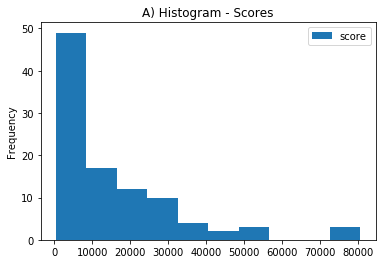

In [33]:
df.plot(kind = "hist", y = "score", bins = 10, title = "A) Histogram - Scores")

In [11]:
five_highest = df.sort_values("score").tail()

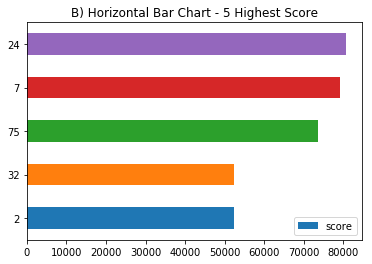

In [32]:
five_highest.plot(kind = "barh", y = "score", title = "B) Horizontal Bar Chart - 5 Highest Score")

In [13]:
sum_of_all = df.sum()

In [14]:
sum_of_all = sum_of_all["score"]

In [15]:
highest = df["score"].max()

In [16]:
highest = int(highest)

In [17]:
df_sum = []
df_sum.append(highest)
df_sum.append(sum_of_all)

In [18]:
new_df = pd.DataFrame(df_sum)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ef73240>],
      dtype=object)

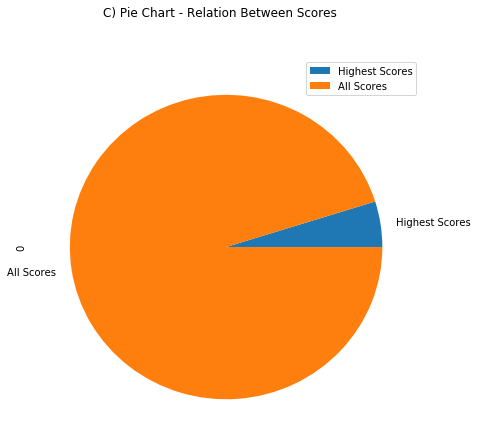

In [34]:
new_df.index = ("Highest Scores", "All Scores")
new_df.plot(kind = "pie", subplots = True, title = "C) Pie Chart - Relation Between Scores", figsize = (7,7))

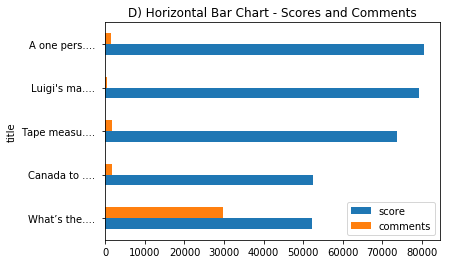

In [39]:
five_highest["title"] = five_highest["title"].apply(lambda x: x[0:10]) +".... "
five_highest.plot(kind = "barh", y =["score", "comments"], title = "D) Horizontal Bar Chart - Scores and Comments", x = "title")